# Task 4

In [36]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Task4.csv')
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [37]:
# Display the first few rows and summary information of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


(   2401  Borderlands  Positive  \
 0  2401  Borderlands  Positive   
 1  2401  Borderlands  Positive   
 2  2401  Borderlands  Positive   
 3  2401  Borderlands  Positive   
 4  2401  Borderlands  Positive   
 
   im getting on borderlands and i will murder you all ,  
 0  I am coming to the borders and I will kill you...     
 1  im getting on borderlands and i will kill you ...     
 2  im coming on borderlands and i will murder you...     
 3  im getting on borderlands 2 and i will murder ...     
 4  im getting into borderlands and i can murder y...     ,
 None)

In [38]:
# Clean up the column names
data.columns = ['ID', 'Brand', 'Sentiment', 'Text']

# Display the first few rows with cleaned column names
data.head()


,ID,Brand,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [39]:
data.describe(include = 'object')

,Brand,Sentiment,Text
count,74681,74681,73995
unique,32,4,69490
top,TomClancysRainbowSix,Negative,
freq,2400,22542,172


In [40]:
data['Brand'].value_counts()

Brand
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)         

<Axes: xlabel='Brand'>

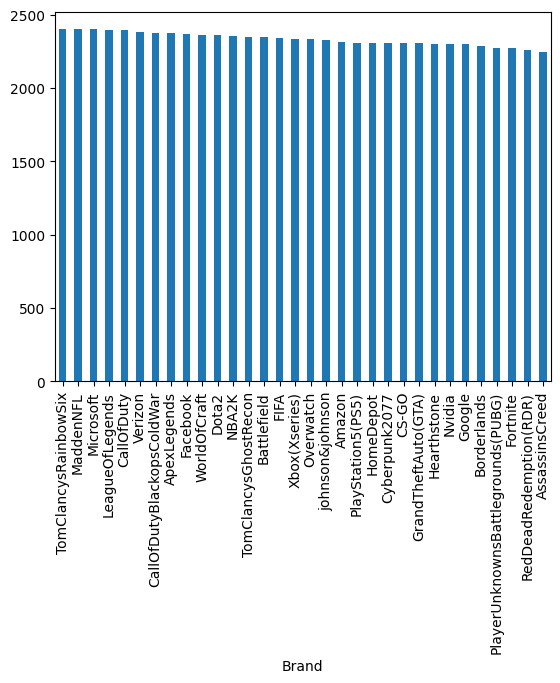

In [6]:
data['Brand'].value_counts().plot(kind = 'bar')

# Handling Null and duplicates

In [41]:
data.isna().sum()

ID             0
Brand          0
Sentiment      0
Text         686
dtype: int64

In [42]:
data.duplicated().sum()

2700

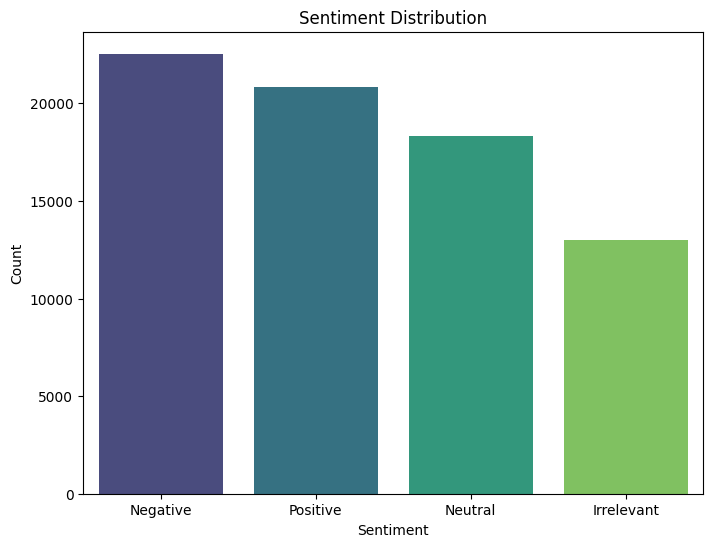

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the Sentiment column to confirm the sentiment types
sentiment_counts = data['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Plot the distribution of sentiments
plt.figure(figsize=(8,6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, hue='Sentiment', palette="viridis", dodge=False, legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


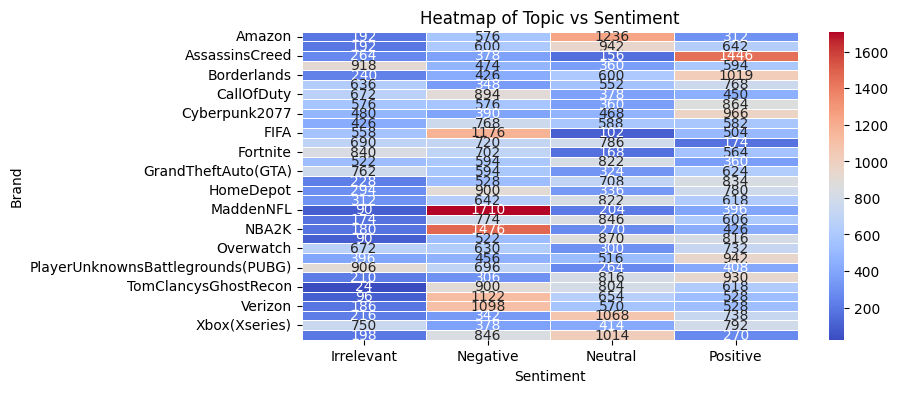

In [46]:
# Create the crosstab
crosstab = pd.crosstab(index=data['Brand'], columns=data['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(8, 4))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Brand')

# Show the plot
plt.show()

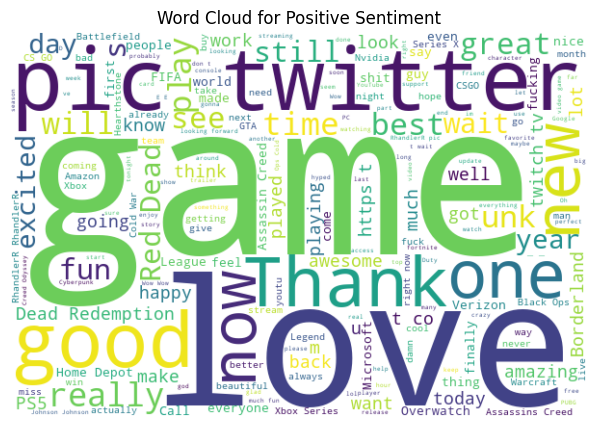

In [19]:
from wordcloud import WordCloud

# Combine all text entries labeled as 'Positive', ignoring NaN values
positive_text = " ".join(review for review in data[data['Sentiment'].str.strip() == 'Positive']['Text'].dropna())

# Generate a word cloud
wordcloud_positive = WordCloud(width=600, height=400, background_color="white").generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Positive Sentiment")
plt.show()

# Building a Model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Extract the relevant text and labels
X = data.iloc[:, 3].fillna('')  # Text data
y = data.iloc[:, 2]             # Labels (assuming "Positive" is the label column)

# Convert categorical labels to numerical values (assuming binary classification)
y = y.map({'Positive': 1, 'Negative': 0})


In [33]:
# Step 1: Data Preprocessing

# Remove rows with NaN values in the target column
X_clean = X[y.notna()]
y_clean = y[y.notna()]

# Step 2: Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Step 3: Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 4: Model training using Logistic Regression
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 5: Predictions and evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.8644380403458213,
 '              precision    recall  f1-score   support\n\n         0.0       0.87      0.87      0.87      4517\n         1.0       0.86      0.86      0.86      4158\n\n    accuracy                           0.86      8675\n   macro avg       0.86      0.86      0.86      8675\nweighted avg       0.86      0.86      0.86      8675\n')

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      4517
         1.0       0.86      0.86      0.86      4158

    accuracy                           0.86      8675
   macro avg       0.86      0.86      0.86      8675
weighted avg       0.86      0.86      0.86      8675

